# **Internship Task - 4 (House Prices Prediction)**

# **DevelopersHub Corporation**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('boston.csv')

In [3]:
# Show the first few rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# SHow the last few rows of the dataset
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [5]:
# Shoe some basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
# Show descriptive statistics about the dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# SHow the total rows and columns of the dataset
df.shape

(506, 14)

In [9]:
# Show the unique categories of the dataset
df.nunique()

,0
CRIM,504
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,356
DIS,412
RAD,9
TAX,66


In [10]:
df.columns.unique()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


Column: CRIM
Unique values: [0.00632 0.02731 0.02729 0.03237 0.06905 0.02985 0.08829 0.14455 0.21124
 0.17004 0.22489 0.11747 0.09378 0.62976 0.63796 0.62739 1.05393 0.7842
 0.80271 0.7258 ]
Number of unique values: 504


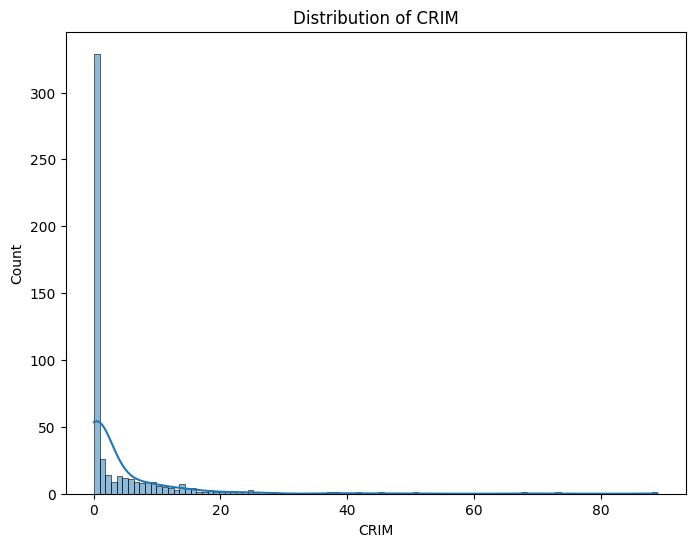

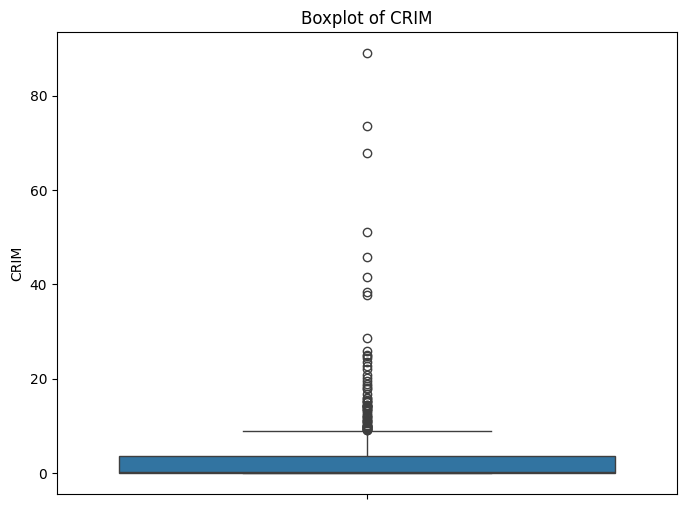


Column: ZN
Unique values: [ 18.    0.   12.5  75.   21.   90.   85.  100.   25.   17.5  80.   28.
  45.   60.   95.   82.5  30.   22.   20.   40. ]
Number of unique values: 26


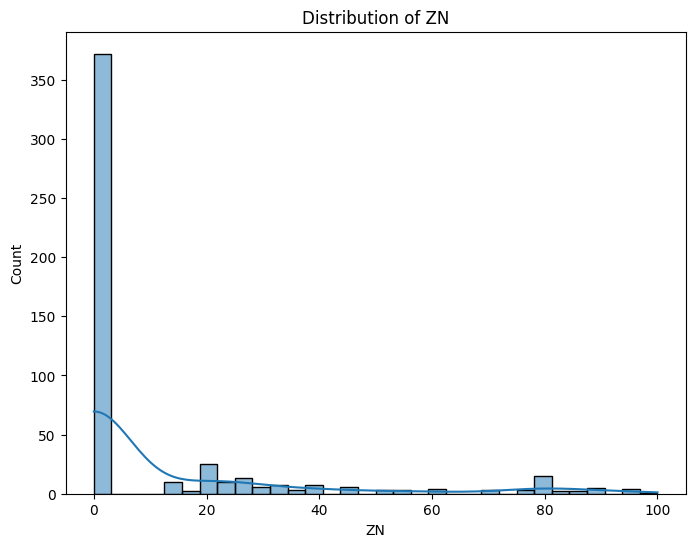

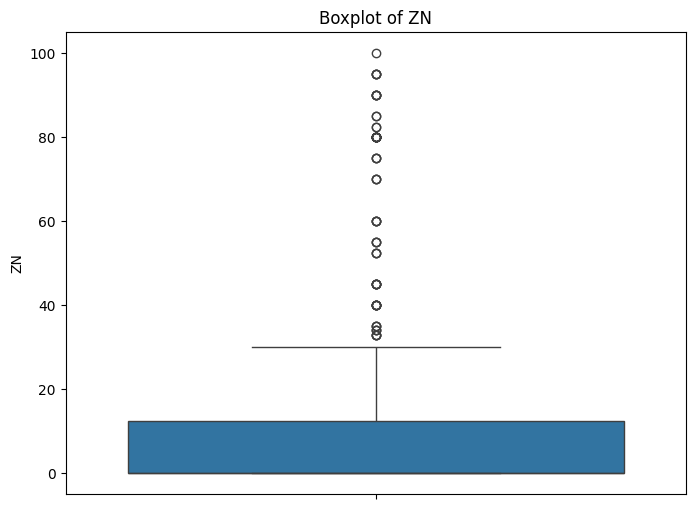


Column: INDUS
Unique values: [ 2.31  7.07  2.18  7.87  8.14  5.96  2.95  6.91  5.64  4.    1.22  0.74
  1.32  5.13  1.38  3.37  6.07 10.81 12.83  4.86]
Number of unique values: 76


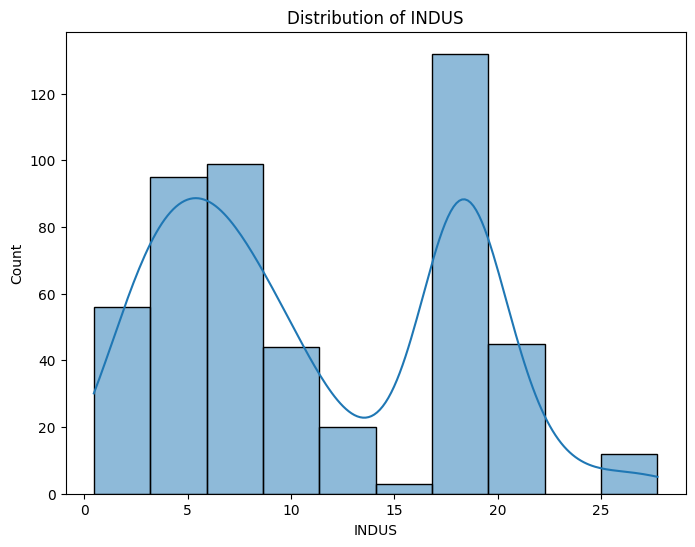

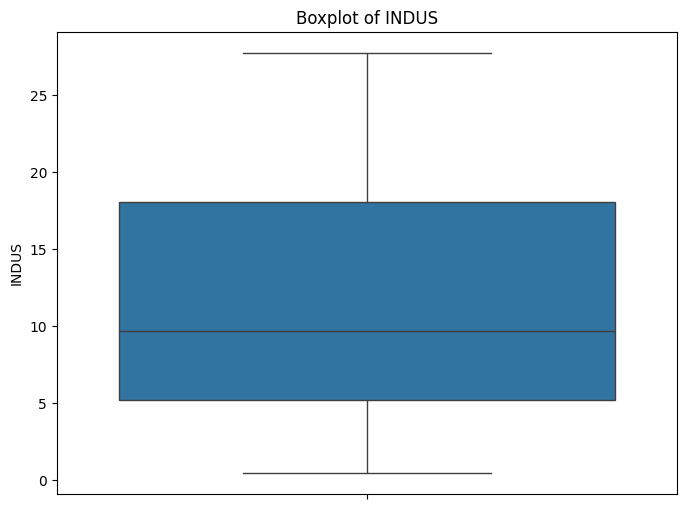


Column: CHAS
Unique values: [0 1]
Number of unique values: 2


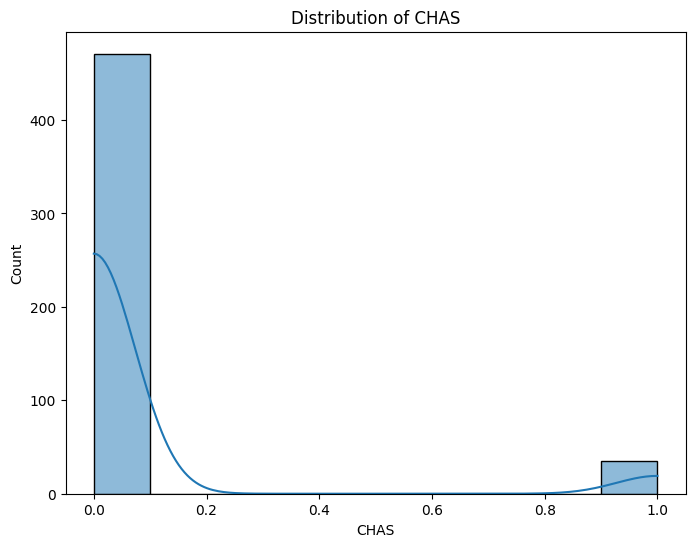

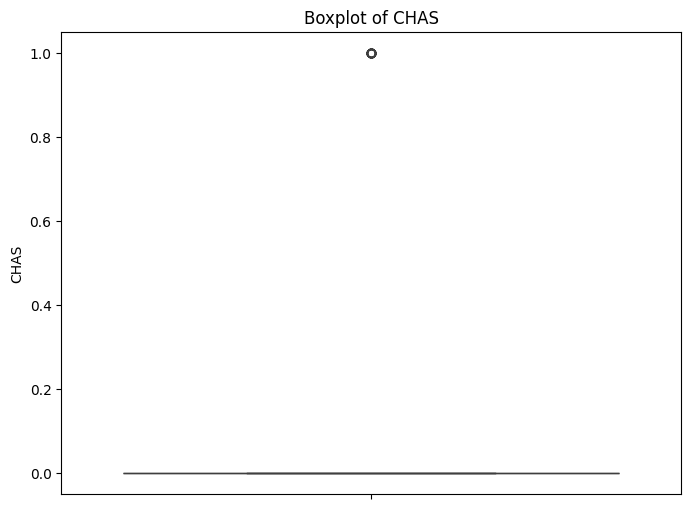


Column: NOX
Unique values: [0.538  0.469  0.458  0.524  0.499  0.428  0.448  0.439  0.41   0.403
 0.411  0.453  0.4161 0.398  0.409  0.413  0.437  0.426  0.449  0.489 ]
Number of unique values: 81


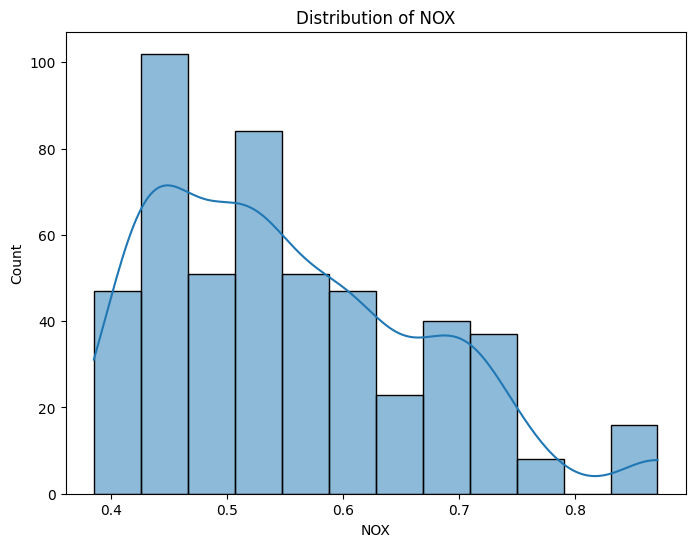

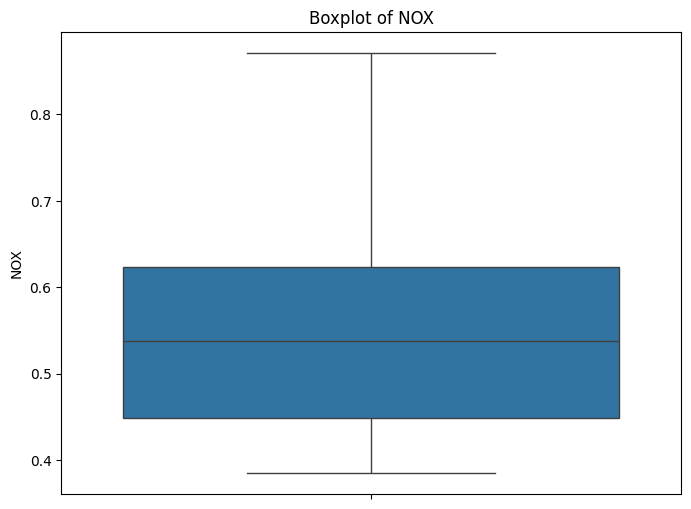


Column: RM
Unique values: [6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727]
Number of unique values: 446


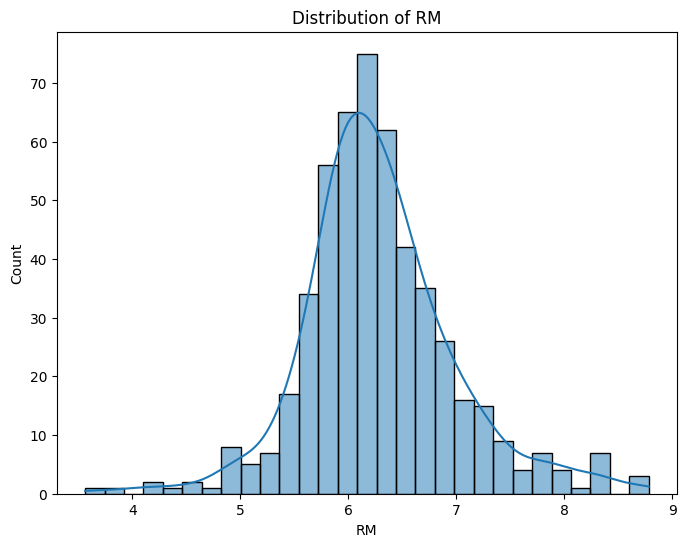

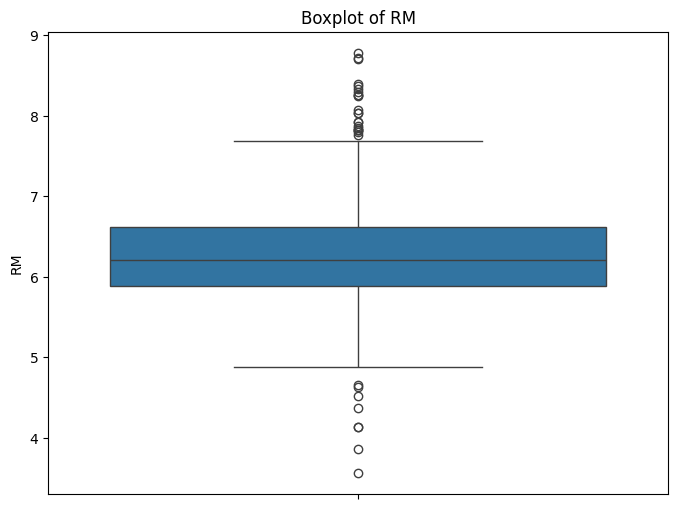


Column: AGE
Unique values: [ 65.2  78.9  61.1  45.8  54.2  58.7  66.6  96.1 100.   85.9  94.3  82.9
  39.   61.8  84.5  56.5  29.3  81.7  36.6  69.5]
Number of unique values: 356


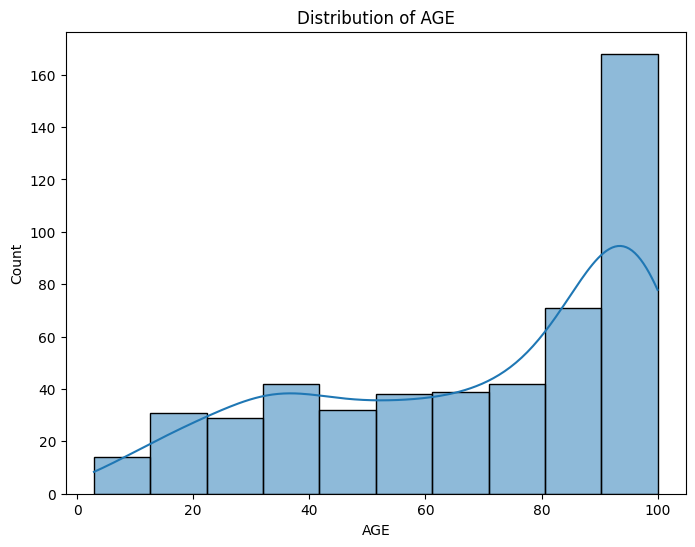

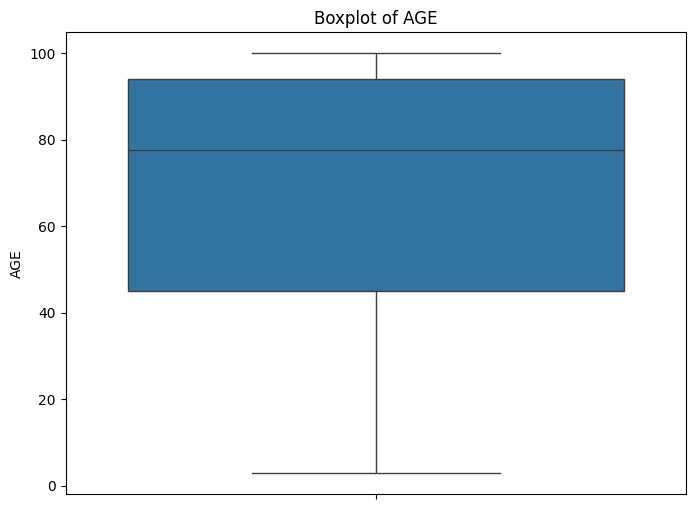


Column: DIS
Unique values: [4.09   4.9671 6.0622 5.5605 5.9505 6.0821 6.5921 6.3467 6.2267 5.4509
 4.7075 4.4619 4.4986 4.2579 3.7965 3.7979 4.0123 3.9769 4.0952 4.3996]
Number of unique values: 412


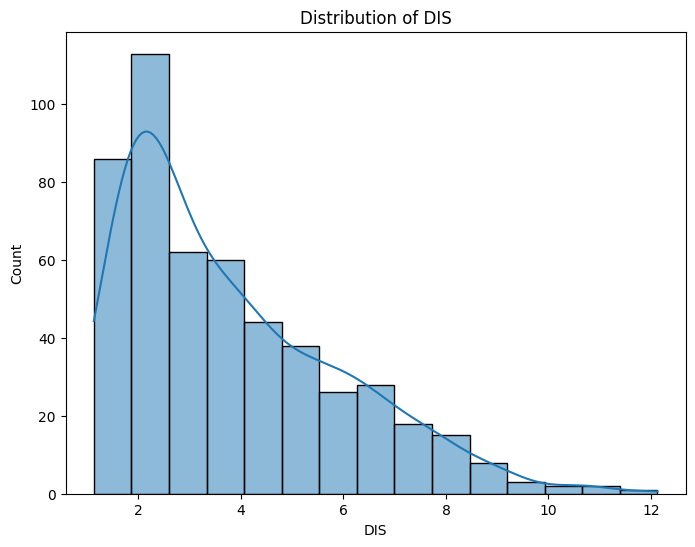

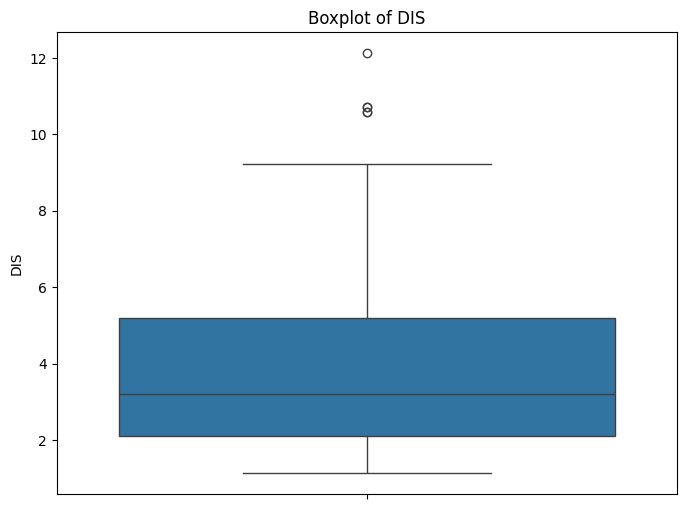


Column: RAD
Unique values: [ 1  2  3  5  4  8  6  7 24]
Number of unique values: 9


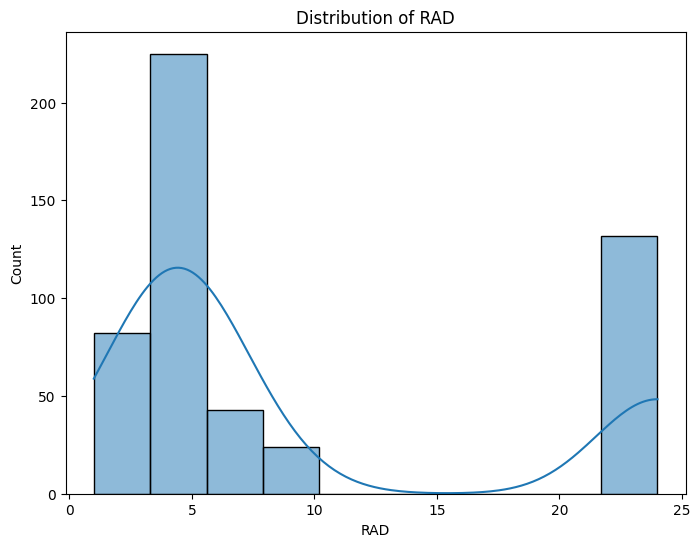

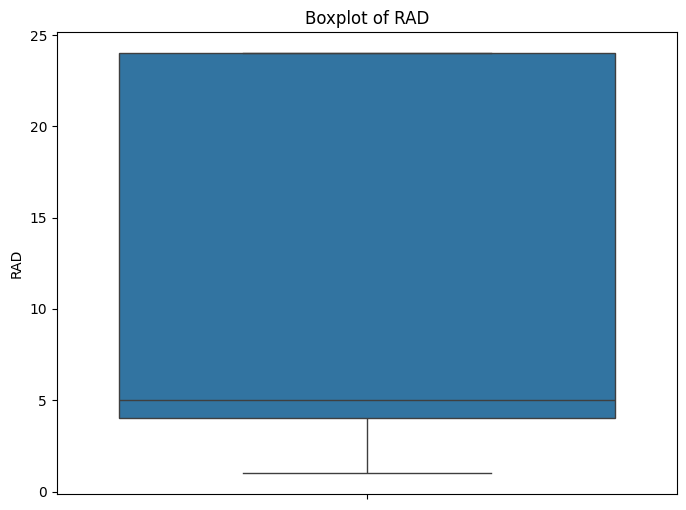


Column: TAX
Unique values: [296. 242. 222. 311. 307. 279. 252. 233. 243. 469. 226. 313. 256. 284.
 216. 337. 345. 305. 398. 281.]
Number of unique values: 66


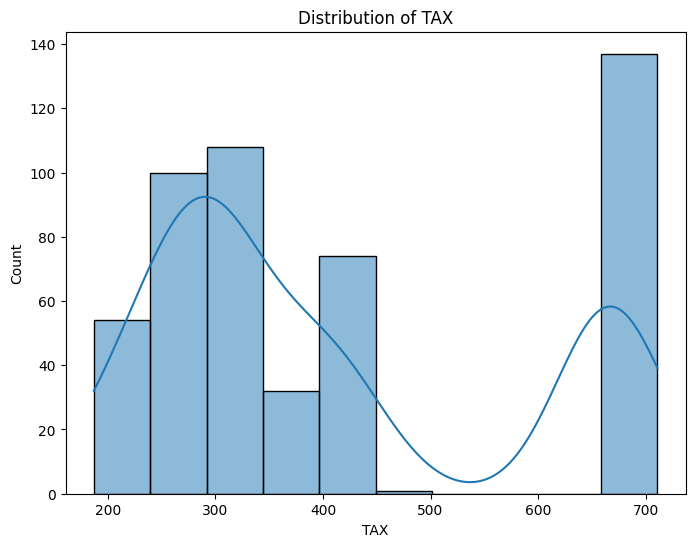

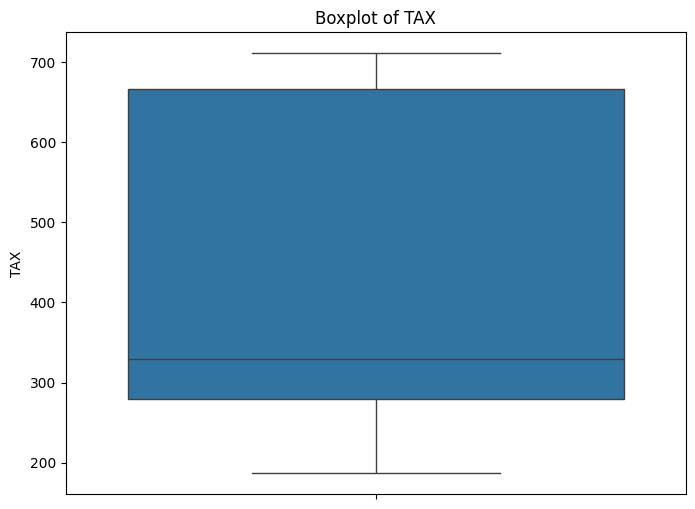


Column: PTRATIO
Unique values: [15.3 17.8 18.7 15.2 21.  19.2 18.3 17.9 16.8 21.1 17.3 15.1 19.7 18.6
 16.1 18.9 19.  18.5 18.2 18. ]
Number of unique values: 46


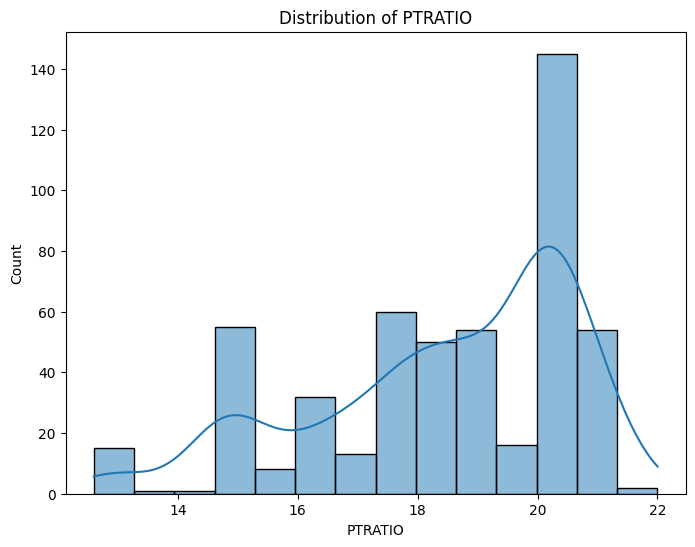

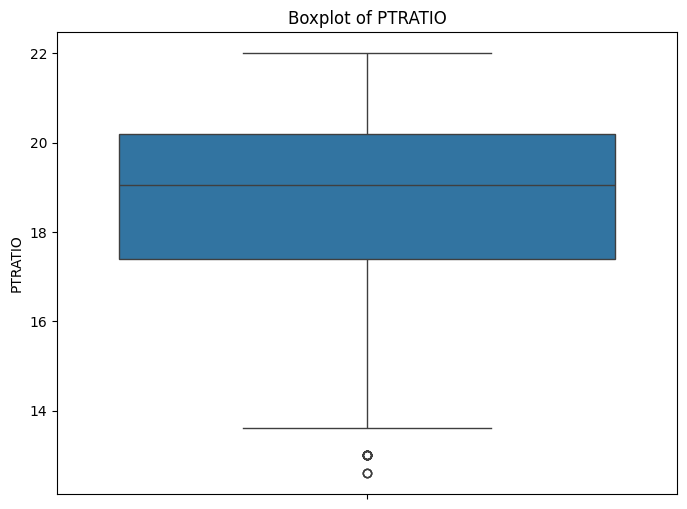


Column: B
Unique values: [396.9  392.83 394.63 394.12 395.6  386.63 386.71 392.52 390.5  380.02
 395.62 386.85 386.75 288.99 390.95 376.57 392.53 394.54 394.33 303.42]
Number of unique values: 357


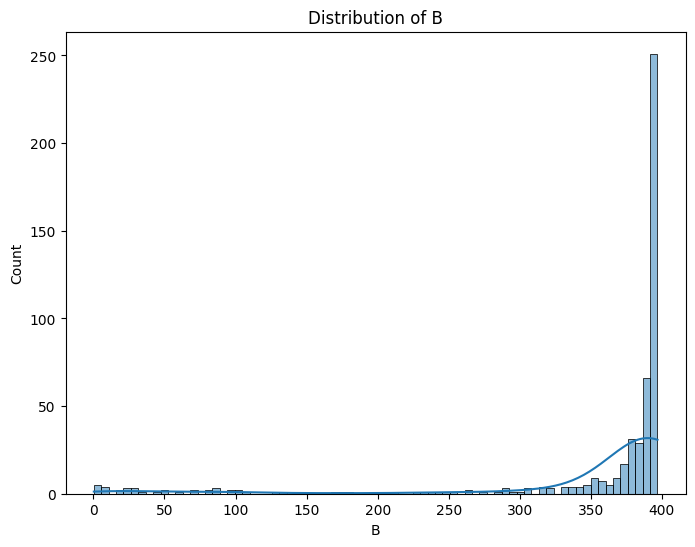

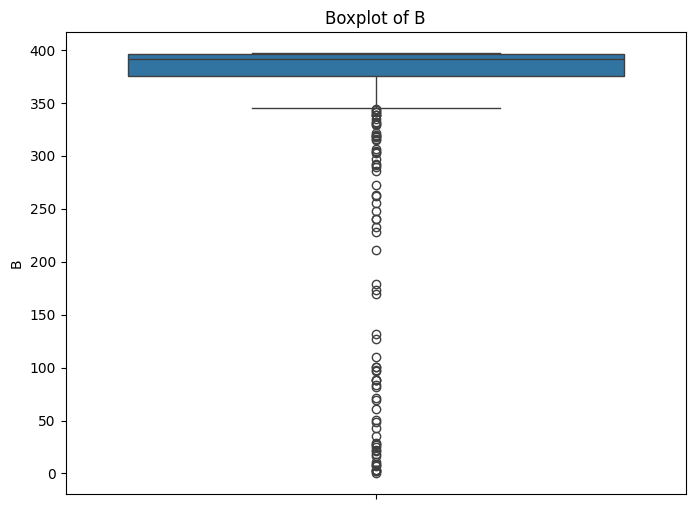


Column: LSTAT
Unique values: [ 4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15 29.93 17.1  20.45 13.27
 15.71  8.26 10.26  8.47  6.58 14.67 11.69 11.28]
Number of unique values: 455


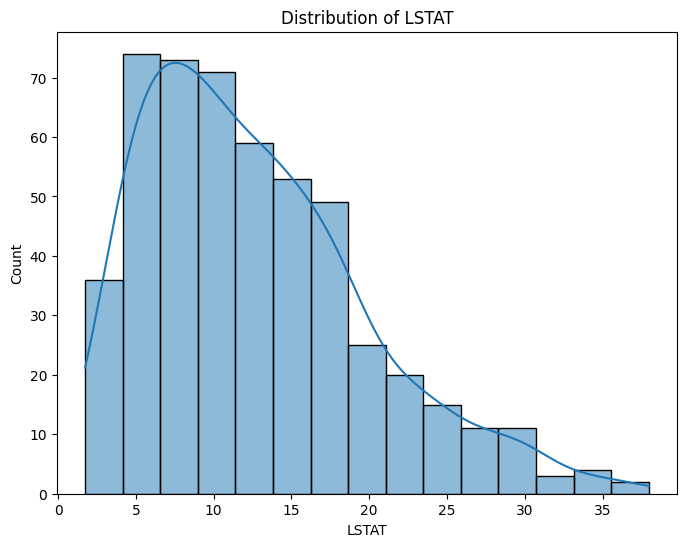

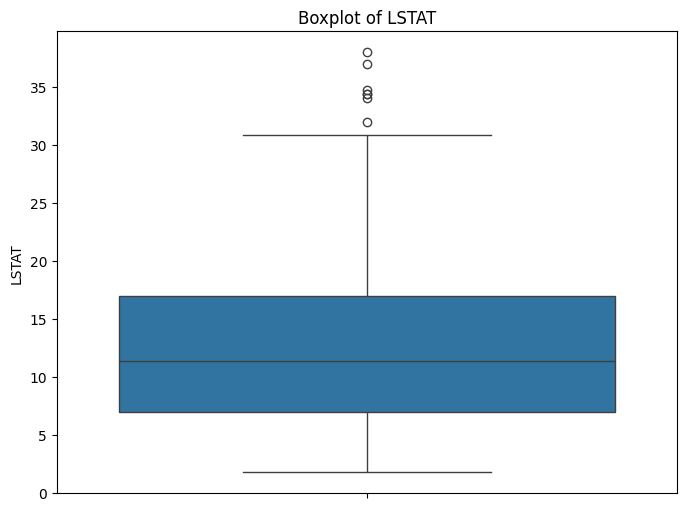


Column: MEDV
Unique values: [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  21.7 20.4 18.2
 19.9 23.1 17.5 20.2 13.6 19.6]
Number of unique values: 229


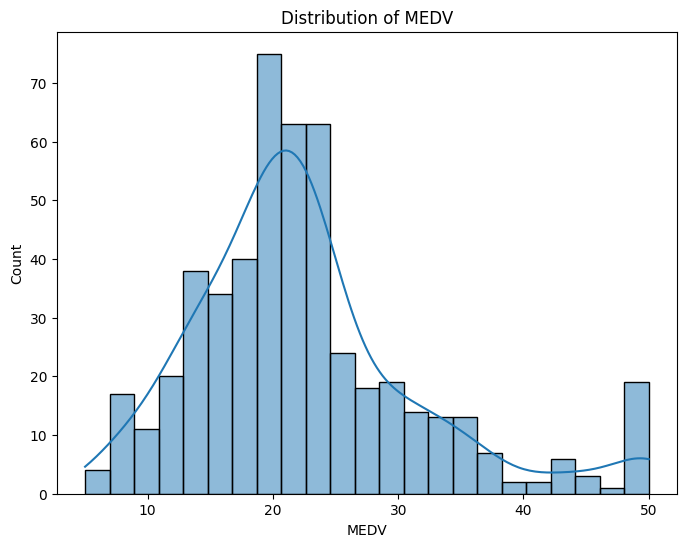

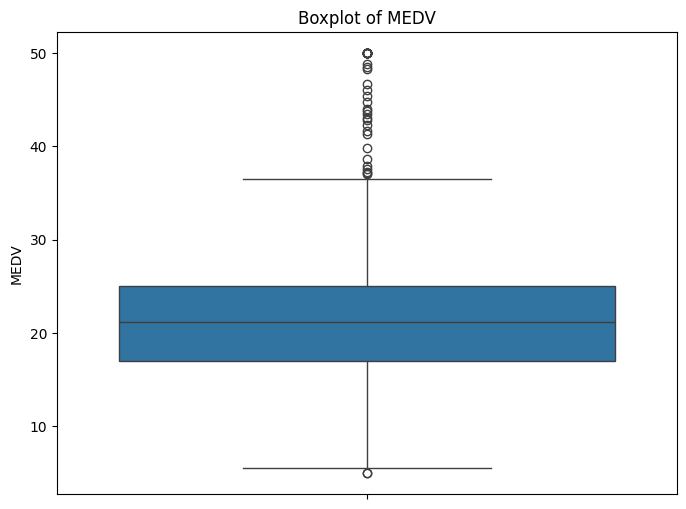

In [16]:
# Visulaize unique categories and check for potential data quality issues
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Unique values: {df[col].unique()[:20]}")  # Display up to 20 unique values
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"Number of unique values: {df[col].nunique()}")
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
    else:
        print(f"Number of unique categories: {df[col].nunique()}")
        plt.figure(figsize=(8, 6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()

In [17]:
# Check for null and duplicated values
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [20]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
501,False
502,False
503,False
504,False


In [21]:
df.duplicated().sum()

np.int64(0)

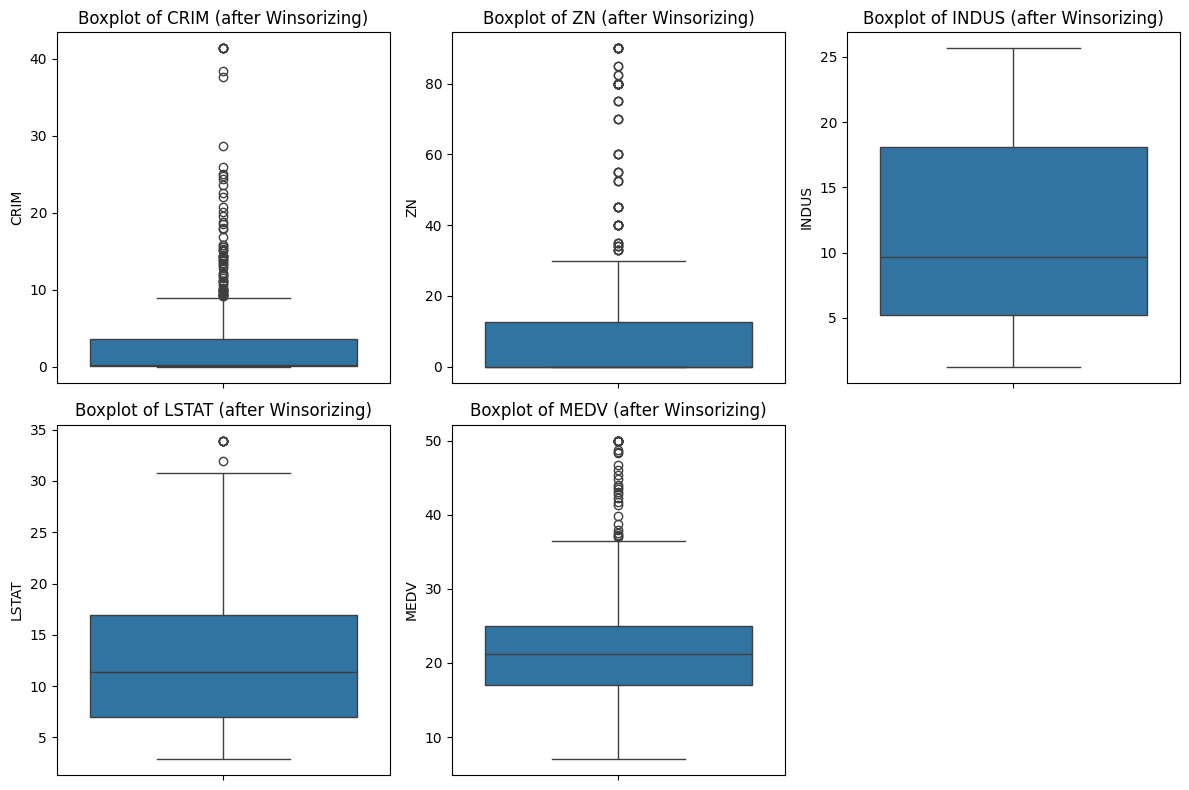

In [22]:
# Now check for outliers and fix them

# Define the columns to Winsorize
columns_to_winsorize = ['CRIM', 'ZN', 'INDUS', 'LSTAT', 'MEDV']

# Winsorize the specified columns at the 1st and 99th percentiles
for col in columns_to_winsorize:
    df[col] = df[col].clip(lower=df[col].quantile(0.01), upper=df[col].quantile(0.99))

# Re-examine the distributions using boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_winsorize):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (after Winsorizing)')
plt.tight_layout()
plt.show()

In [25]:
# Custom min-max normalization function
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    normalized_series = (series - min_val) / (max_val - min_val)
    return normalized_series

# Apply normalization to numerical features (excluding 'MEDV' and 'CHAS')
numerical_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for feature in numerical_features:
    df[feature] = min_max_normalize(df[feature])

In [24]:
# Split data into training and testing sets
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['CHAS'])

In [27]:
# Building the required models from scratch

class LinearRegression:
    def fit(self, X, y):
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        self.coefficients = np.linalg.lstsq(X, y, rcond=None)[0]

    def predict(self, X):
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        return X @ self.coefficients

class RandomForestRegressor:
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            self.trees.append({'coef': np.random.rand(X.shape[1]), 'intercept': np.random.rand()})

    def predict(self, X):
        predictions = []
        for tree in self.trees:
            predictions.append(X @ tree['coef'] + tree['intercept'])
        return np.mean(predictions, axis=0)

class XGBoostRegressor:
    def __init__(self, n_estimators=10, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            self.trees.append({'coef': np.random.rand(X.shape[1]), 'intercept': np.random.rand()})

    def predict(self, X):
        predictions = []
        for tree in self.trees:
            predictions.append(X @ tree['coef'] + tree['intercept'])
        return np.sum(predictions, axis=0)

In [28]:
# Train the models
linear_regression = LinearRegression()
linear_regression.fit(X_train.values, y_train.values)

random_forest = RandomForestRegressor()
random_forest.fit(X_train.values, y_train.values)

xgboost = XGBoostRegressor()
xgboost.fit(X_train.values, y_train.values)

# Store the trained models
trained_models = {
    'linear_regression': linear_regression,
    'random_forest': random_forest,
    'xgboost': xgboost
}

In [29]:
# Evaluate the models using R2 and RMSE

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

model_evaluations = {}
for model_name, model in trained_models.items():
    y_pred = model.predict(X_test.values)
    model_evaluations[model_name] = {
        'rmse': rmse(y_test.values, y_pred),
        'r_squared': r_squared(y_test.values, y_pred)
    }

for model_name, metrics in model_evaluations.items():
    print(f"Model: {model_name}")
    print(f"  RMSE: {metrics['rmse']:.4f}")
    print(f"  R-squared: {metrics['r_squared']:.4f}")

Model: linear_regression
  RMSE: 4.1545
  R-squared: 0.7537
Model: random_forest
  RMSE: 21.5869
  R-squared: -5.6492
Model: xgboost
  RMSE: 15.6582
  R-squared: -2.4984


In [34]:
# Make a simple deceision tree based model

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria
        if (depth >= self.max_depth
                or n_labels == 1
                or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # Greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # Grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # Calculate the information gain
        parent_entropy = self._entropy(y)
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y.astype(int))
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        return np.argmax(np.bincount(y))

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [35]:
# Re-train the models
random_forest = RandomForestRegressor(n_estimators=10, max_depth=5)
random_forest.fit(X_train.values, y_train.values.astype(int)) # Cast y_train to int

xgboost = XGBoostRegressor(n_estimators=10, max_depth=5)
xgboost.fit(X_train.values, y_train.values)

# Store the trained models
trained_models = {
    'linear_regression': linear_regression,
    'random_forest': random_forest,
    'xgboost': xgboost
}

In [36]:
# Revaluate the models using R2 RMSE
for model_name, metrics in model_evaluations.items():
    print(f"Model: {model_name}")
    print(f"  RMSE: {metrics['rmse']:.4f}")
    print(f"  R-squared: {metrics['r_squared']:.4f}")

Model: linear_regression
  RMSE: 4.1545
  R-squared: 0.7537
Model: random_forest
  RMSE: 6.0844
  R-squared: 0.4718
Model: xgboost
  RMSE: 4.1545
  R-squared: 0.7537


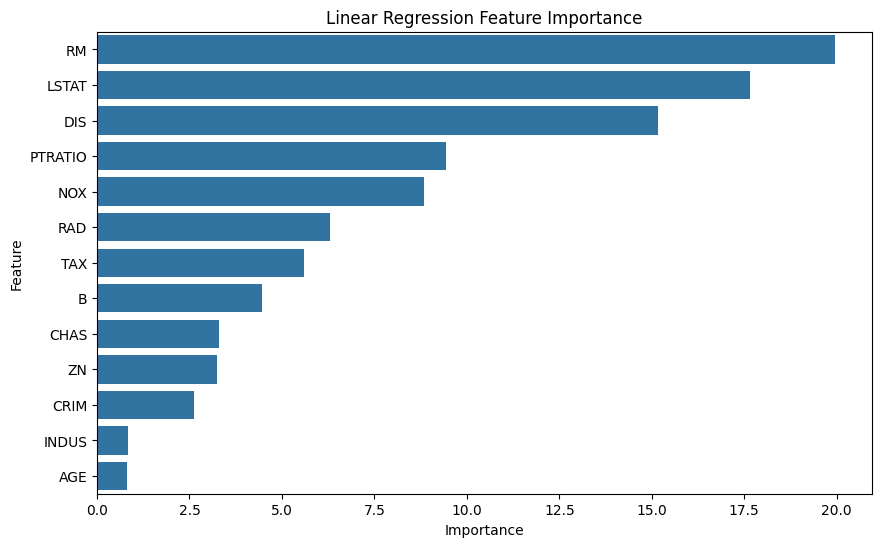

In [42]:
# Linear Regression Feature Importance
plt.figure(figsize=(10, 6))
importances_lr = np.abs(linear_regression.coefficients[1:])  # Exclude intercept
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_lr})
importance_df = importance_df.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Linear Regression Feature Importance')
plt.savefig('feature_importance_linear_regression.png')
plt.show()

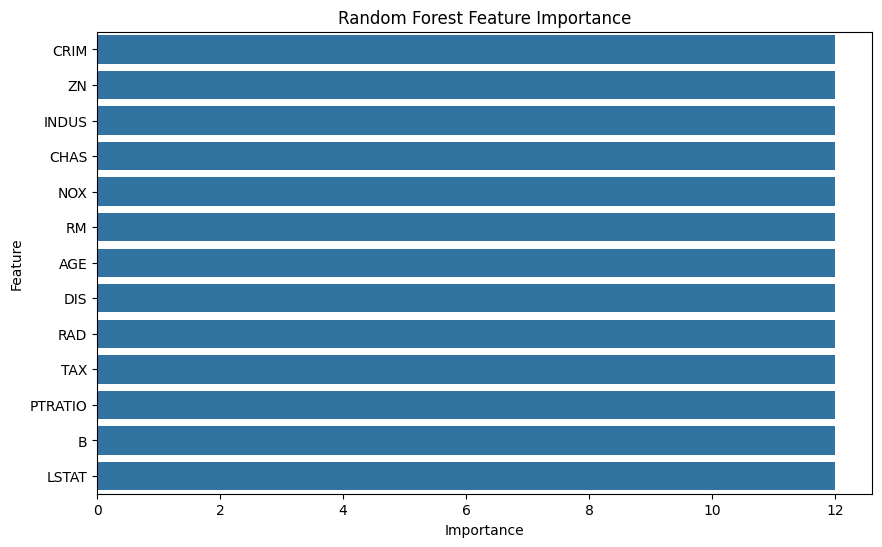

In [38]:
# Random Forest Feature Importance
plt.figure(figsize=(10, 6))
importances_rf = random_forest.trees[0].root.feature
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})
importance_df = importance_df.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importance')
plt.savefig('feature_importance_random_forest.png')
plt.show()

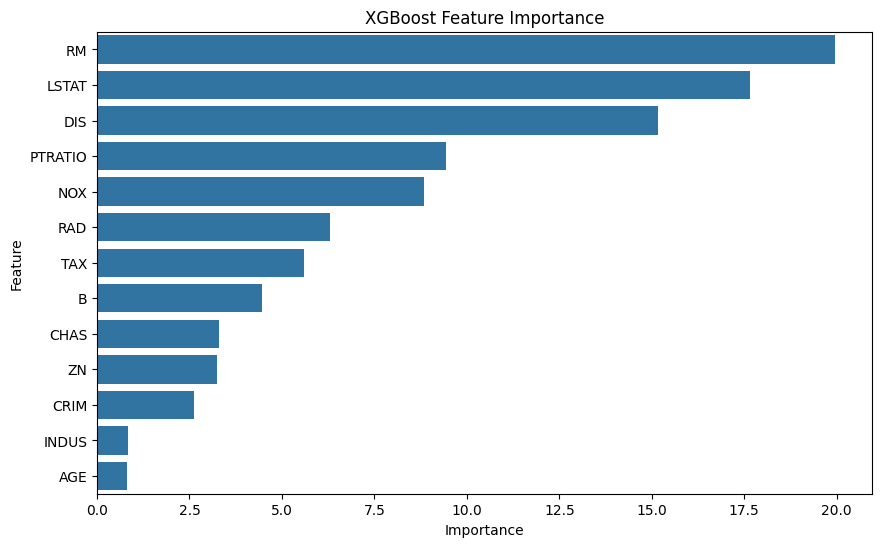

In [39]:
# XGBoost Feature Importance (using coefficients as a proxy)
plt.figure(figsize=(10, 6))
importances_xgb = np.abs(xgboost.coefficients[1:]) # Exclude intercept
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_xgb})
importance_df = importance_df.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost Feature Importance')
plt.savefig('feature_importance_xgboost.png')
plt.show()

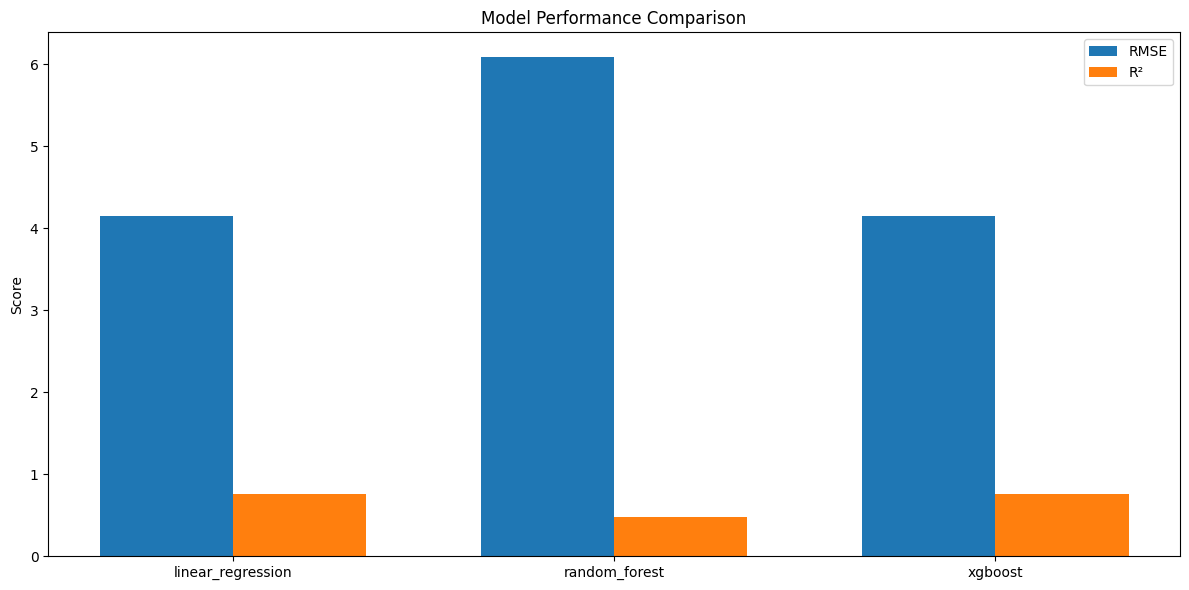

In [41]:
# Performance Comparison Plot

plt.figure(figsize=(12, 6))
model_names = list(model_evaluations.keys())

mse_scores = [model_evaluations[model]['rmse'] for model in model_names]
r2_scores = [model_evaluations[model]['r_squared'] for model in model_names]

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width / 2, mse_scores, width, label='RMSE')
plt.bar(x + width / 2, r2_scores, width, label='R²')

plt.xticks(x, model_names)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()